In [59]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Standardabweichung mit reinnehmen

# Data loading

In [60]:
#load all evaluation result datasets from csv

#1: gpt4o-mini-gui
df_gpt4o_mini_gui = pd.read_csv('./data/test_results_gpt4o-mini_gui.csv')

#2: gpt4o-gui
df_gpt4o_gui = pd.read_csv('./data/test_results_gpt4o_gui.csv')

#3: student-baseline
df_student_baseline = pd.read_csv('./data/test_results_student_baseline.csv')

# Data transformation

In [61]:
# add new column for model name
df_gpt4o_mini_gui['model'] = 'gpt4o-mini'
df_gpt4o_gui['model'] = 'gpt4o'
df_student_baseline['model'] = 'student-baseline'

#add new column for difficulty based on the following rule
#task number 1 = easy, 2,3 = intermediate, 4 = hard
df_gpt4o_mini_gui['difficulty'] = 'easy'
df_gpt4o_gui['difficulty'] = 'easy'
df_student_baseline['difficulty'] = 'easy'

df_gpt4o_mini_gui.loc[df_gpt4o_mini_gui['task_number'] == 2, 'difficulty'] = 'intermediate'
df_gpt4o_mini_gui.loc[df_gpt4o_mini_gui['task_number'] == 3, 'difficulty'] = 'intermediate'
df_gpt4o_mini_gui.loc[df_gpt4o_mini_gui['task_number'] == 4, 'difficulty'] = 'hard'

df_gpt4o_gui.loc[df_gpt4o_gui['task_number'] == 2, 'difficulty'] = 'intermediate'
df_gpt4o_gui.loc[df_gpt4o_gui['task_number'] == 3, 'difficulty'] = 'intermediate'
df_gpt4o_gui.loc[df_gpt4o_gui['task_number'] == 4, 'difficulty'] = 'hard'

df_student_baseline.loc[df_student_baseline['task_number'] == 2, 'difficulty'] = 'intermediate'
df_student_baseline.loc[df_student_baseline['task_number'] == 3, 'difficulty'] = 'intermediate'
df_student_baseline.loc[df_student_baseline['task_number'] == 4, 'difficulty'] = 'hard'


In [62]:
#create new dataframe with all results
df = pd.concat([df_gpt4o_mini_gui, df_gpt4o_gui, df_student_baseline])

In [63]:
#drop columns "task_number", "timestamp", "seed", "exercise_count"
df = df.drop(columns=['task_number', 'seed', 'exercise_count'])

In [64]:
#set all NaN values in the "tests_passed_percent" column to 0
df['tests_passed_percent'] = df['tests_passed_percent'].fillna(0)

#add new column "test_passed_50%" for each row that has a score of 50% or higher on test_passed_percent
df['test_passed_50%'] = df['tests_passed_percent'] >= 50

#divide test_passed_percent by 100 to get a percentage value
df['tests_passed_percent'] = df['tests_passed_percent'] / 100

In [65]:
df.head()

,student_submission,task_name,unique_id,timestamp,test_passed,tests_passed_percent,pylint_score,cyclomatic_complexity,model,difficulty,test_passed_50%
0,submission_12,rna_transcription,f7e7fc57-6e5b-4b67-a71f-eef896940cef,2024-11-11 12:03:55,True,1.0,8.33,6.0,gpt4o-mini,easy,True
1,submission_12,etl,f7e7fc57-6e5b-4b67-a71f-eef896940cef,2024-11-11 12:03:55,True,1.0,6.67,3.0,gpt4o-mini,intermediate,True
2,submission_12,allergies,f7e7fc57-6e5b-4b67-a71f-eef896940cef,2024-11-11 12:03:55,False,0.0,NaN,NaN,gpt4o-mini,intermediate,False
3,submission_12,simple_cipher,f7e7fc57-6e5b-4b67-a71f-eef896940cef,2024-11-11 12:03:55,False,0.0,NaN,NaN,gpt4o-mini,hard,False
4,submission_13,gigasecond,4070dcf0-93ad-4209-b6f5-79d4b3236164,2024-11-11 12:21:09,True,1.0,0.00,1.0,gpt4o-mini,easy,True


# Analysis

## Tests passed by model

In [66]:
sns.set_theme(style="whitegrid")

C:\Users\LucaH\AppData\Local\Temp\ipykernel_151460\3204915442.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['difficulty', 'model'])['test_passed'].mean().unstack() * 100


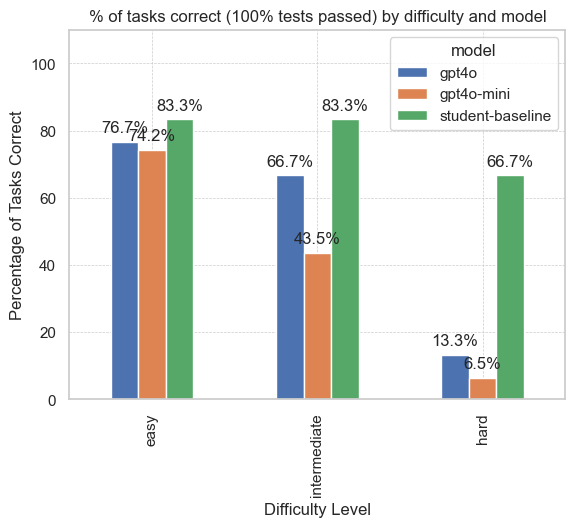

In [67]:
# Set the order of difficulty labels
df['difficulty'] = pd.Categorical(df['difficulty'], categories=['easy', 'intermediate', 'hard'], ordered=True)

# Group by difficulty and model, then plot
df_grouped = df.groupby(['difficulty', 'model'])['test_passed'].mean().unstack() * 100
ax = df_grouped.plot(kind='bar')
ax.set_ylim(0, 110)
ax.set_title('% of tasks correct (100% tests passed) by difficulty and model')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xlabel('Difficulty Level')
ax.set_ylabel('Percentage of Tasks Correct')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

C:\Users\LucaH\AppData\Local\Temp\ipykernel_151460\3173638750.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['difficulty', 'model'])['tests_passed_percent'].mean().unstack() * 100


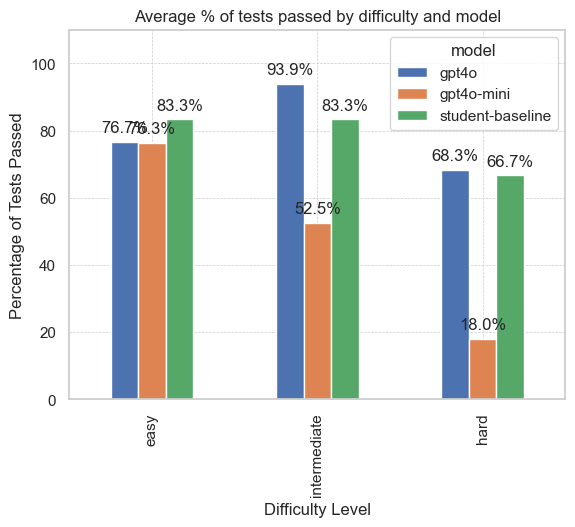

In [68]:
# Set the order of difficulty labels
df['difficulty'] = pd.Categorical(df['difficulty'], categories=['easy', 'intermediate', 'hard'], ordered=True)

# Group by difficulty and model, then plot
df_grouped = df.groupby(['difficulty', 'model'])['tests_passed_percent'].mean().unstack() * 100
ax = df_grouped.plot(kind='bar')
ax.set_ylim(0, 110)
ax.set_title('Average % of tests passed by difficulty and model')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xlabel('Difficulty Level')
ax.set_ylabel('Percentage of Tests Passed')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

## Tests passed (>= 50%) by model

C:\Users\LucaH\AppData\Local\Temp\ipykernel_151460\1551424309.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['difficulty', 'model'])['test_passed_50%'].mean().unstack() * 100


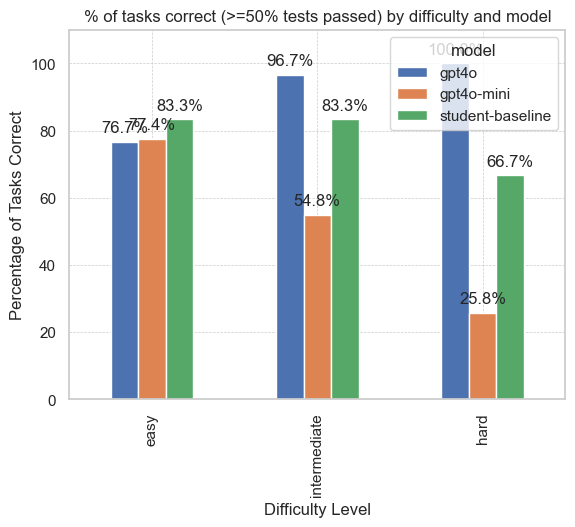

In [69]:
# Set the order of difficulty labels
df['difficulty'] = pd.Categorical(df['difficulty'], categories=['easy', 'intermediate', 'hard'], ordered=True)

# Group by difficulty and model, then plot
df_grouped = df.groupby(['difficulty', 'model'])['test_passed_50%'].mean().unstack() * 100
ax = df_grouped.plot(kind='bar')
ax.set_ylim(0, 110)
ax.set_ylabel('Percentage of tasks passed')
ax.set_title('% of tasks correct (>=50% tests passed) by difficulty and model')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xlabel('Difficulty Level')
ax.set_ylabel('Percentage of Tasks Correct')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [105]:
# Now create a table with the average % of tests passed, % of tasks passed and % of tasks passed with 50% or more
df_grouped = df.groupby(['model'])[['tests_passed_percent', 'test_passed', 'test_passed_50%']].mean() * 100
df_grouped = df_grouped.round(2)

# Rename the columns
df_grouped = df_grouped.rename(columns={
    'tests_passed_percent': 'Average % of Tests Passed',
    'test_passed': 'Average % of Tasks Passed (=100% tests)',
    'test_passed_50%': 'Average % of Tasks Passed (>= 50% tests)'
})

# Add percentage sign to the values
df_grouped = df_grouped.applymap(lambda x: f'{x}%')

# Transpose the table
df_grouped = df_grouped.transpose()

df_grouped

C:\Users\LucaH\AppData\Local\Temp\ipykernel_151460\885324481.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_grouped = df_grouped.applymap(lambda x: f'{x}%')


model,gpt4o,gpt4o-mini,student-baseline
Average % of Tests Passed,83.21%,49.83%,79.17%
Average % of Tasks Passed (=100% tests),55.83%,41.94%,79.17%
Average % of Tasks Passed (>= 50% tests),92.5%,53.23%,79.17%


## PyLint Score and Cyclomatic Complexity

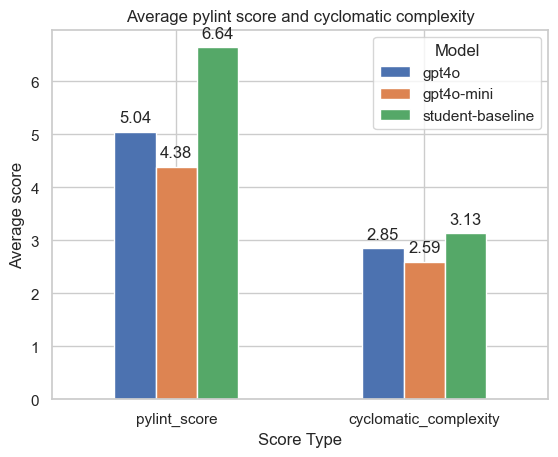

In [106]:
# Transpose and reformat the data for plotting
df_grouped = df.groupby(['model'])[['pylint_score', 'cyclomatic_complexity']].mean().T
ax = df_grouped.plot(kind='bar')

plt.ylabel('Average score')
plt.title('Average pylint score and cyclomatic complexity')
plt.xticks(rotation=0)
plt.xlabel('Score Type')
plt.legend(title='Model', loc='best')  # Models will be shown in the legend

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


## Task

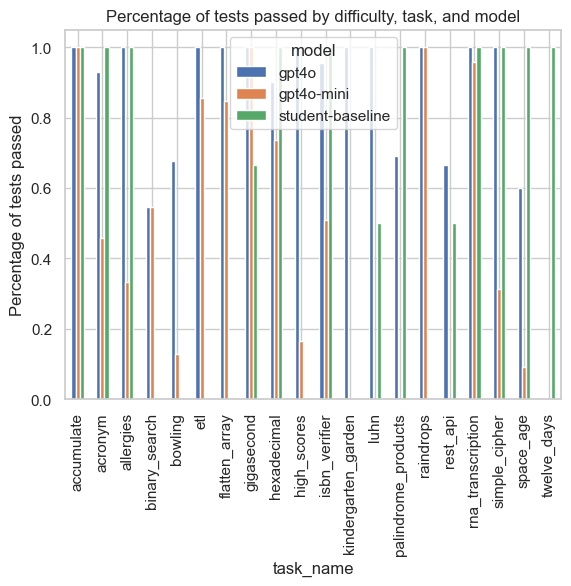

In [72]:
# Group by difficulty, task_name, and model, then plot
df_grouped = df.groupby(['task_name', 'model'])['tests_passed_percent'].mean().unstack()
df_grouped.plot(kind='bar')

plt.ylabel('Percentage of tests passed')
plt.title('Percentage of tests passed by difficulty, task, and model')
plt.show()


C:\Users\LucaH\AppData\Local\Temp\ipykernel_151460\2488046299.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['difficulty', 'task_name', 'model'])['tests_passed_percent'].mean().unstack().dropna(how='all')


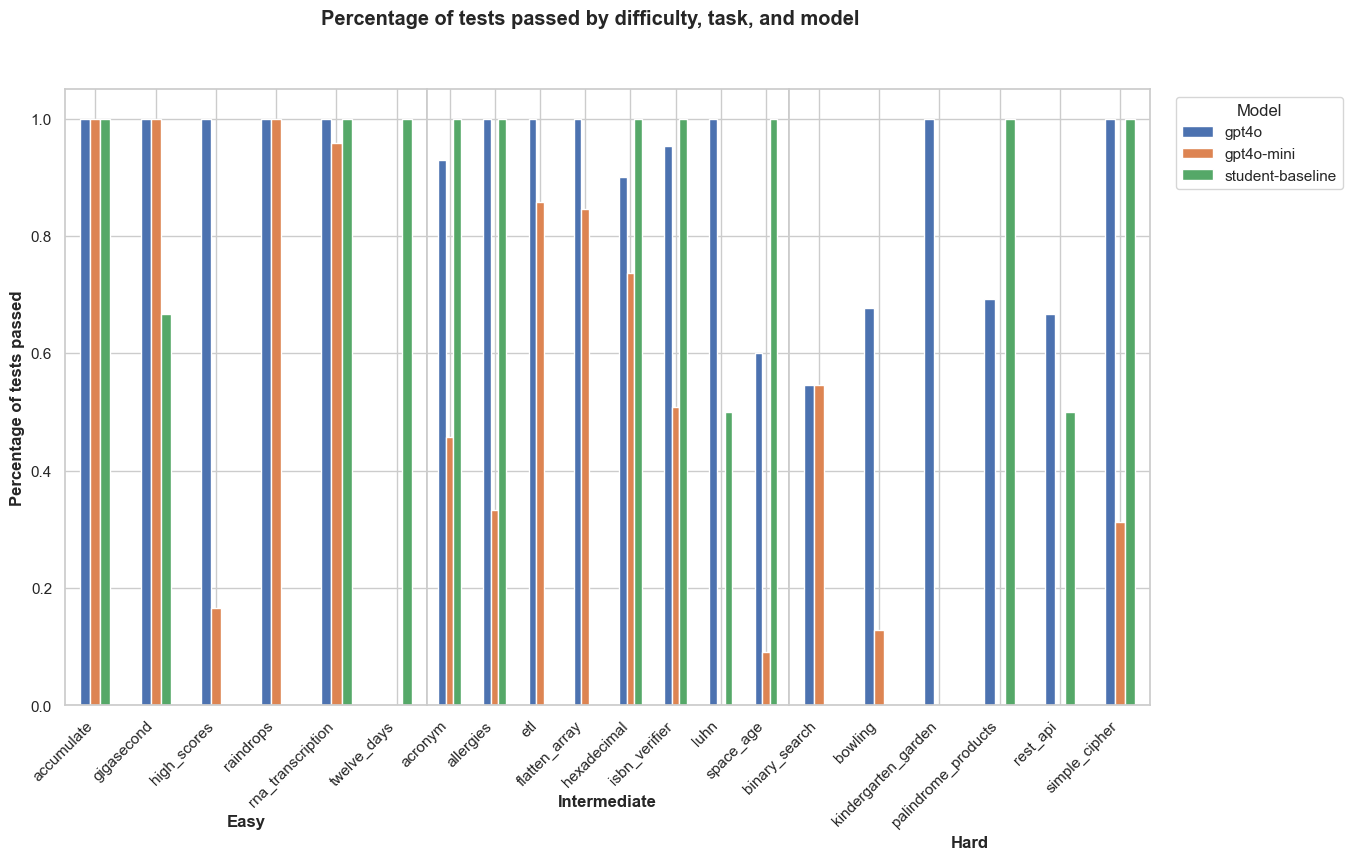

In [73]:
import matplotlib.pyplot as plt

# Group and pivot data for plotting, dropping rows with all NaN values
df_grouped = df.groupby(['difficulty', 'task_name', 'model'])['tests_passed_percent'].mean().unstack().dropna(how='all')

# Define plot function to create individual subplots with unstacked bars
def plot_function(difficulty, ax):
    # Select data for the specific difficulty
    ax = graph[difficulty]
    # Plotting data using bar chart with unstacked bars for each model
    df_plot = df_grouped.xs(difficulty)
    df_plot = df_plot.dropna(how='all')  # Drop empty rows for the specific difficulty
    df_plot.plot(kind='bar', ax=ax, legend=False)
    ax.set_xticklabels(df_plot.index.get_level_values('task_name'), rotation=45, ha='right')  # Set task names as x-tick labels
    ax.set_xlabel(difficulty.capitalize(), fontsize=12, weight='bold')  # Set x-axis label to 'easy', 'intermediate', or 'hard'

# Set up the subplots
unique_difficulties = df['difficulty'].unique()
n_subplots = len(unique_difficulties)
fig, axes = plt.subplots(nrows=1, ncols=n_subplots, sharey=True, figsize=(14, 8))  # width, height

# Create a mapping of difficulties to axes
graph = dict(zip(unique_difficulties, axes))
plots = list(map(lambda x: plot_function(x, graph[x]), graph))

# Common plot settings
plt.subplots_adjust(wspace=0)
axes[0].set_ylabel('Percentage of tests passed', weight='bold')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.suptitle('Percentage of tests passed by difficulty, task, and model', weight='bold')
plt.show()


# Survey evaluation

In [74]:
# load survey evaluatuion results
df_survey = pd.read_csv('./data/results-survey163574.csv')

In [75]:
# drop column lastpage, Mask02, startlanguage, datestamp, Mask02[filecount]
df_survey = df_survey.drop(columns=['lastpage', 'Mask02', 'startlanguage', 'datestamp', 'Mask02[filecount]'])

In [76]:
# use df_student_baseline df to get the timestamp for each unique_id
# make a new dataframe with unique_id and timestamp
df_timestamp = df_student_baseline[['unique_id', 'timestamp']]
# drop duplicates
df_timestamp = df_timestamp.drop_duplicates()

# merge df_survey with df_timestamp on unique_id. In the survey data, the unique_id is called "G02Q03"
df_survey = df_survey.merge(df_timestamp, left_on='G01Q02', right_on='unique_id', how='left')
# drop the unique_id column
df_survey = df_survey.drop(columns=['unique_id'])

# rename timestamp to "start_time"
df_survey = df_survey.rename(columns={'timestamp': 'start_time'})

# calculate the time spent on the task by subtracting 'startdate' from 'start_time'
df_survey['start_time'] = pd.to_datetime(df_survey['start_time'])
df_survey['startdate'] = pd.to_datetime(df_survey['startdate'])
df_survey['time_spent'] = df_survey['startdate'] - df_survey['start_time']

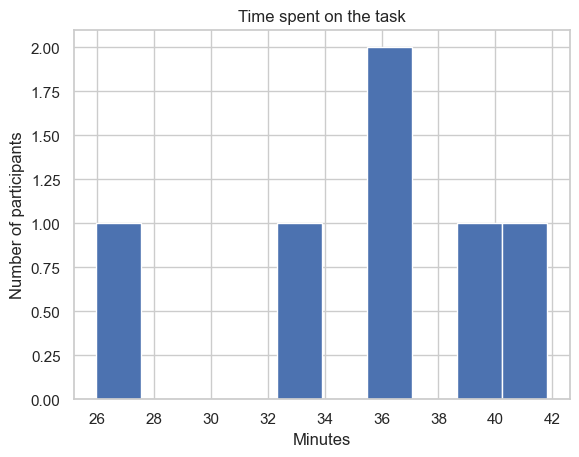

In [77]:
# visualize the time spent on the task in minutes
# buckets 
df_survey['time_spent'] = df_survey['time_spent'].dt.total_seconds() / 60
df_survey['time_spent'].hist()
plt.title('Time spent on the task')
plt.xlabel('Minutes')
plt.ylabel('Number of participants')
plt.show()


In [78]:
# describe the time spent on the task
df_survey['time_spent'].describe()

count     6.000000
mean     35.225000
std       5.520887
min      25.983333
25%      33.416667
50%      35.858333
75%      38.387500
max      41.816667
Name: time_spent, dtype: float64

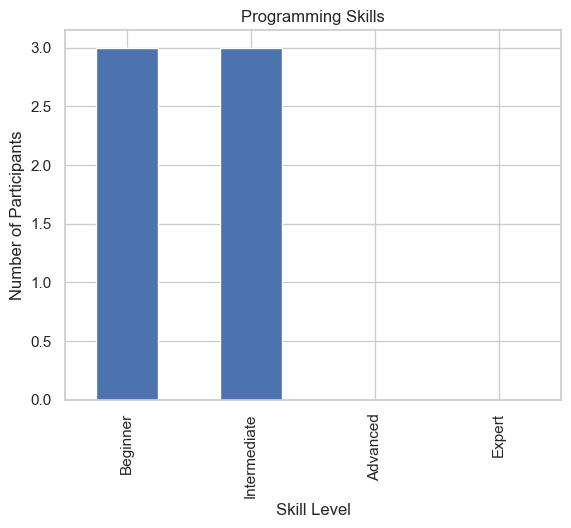

In [79]:
# visualize the column G01Q06
# the question is: How would you rate your programming skills? The options are:  Beginner Intermediate Advanced Expert 
# show all options in the chart
df_survey['G01Q06'] = pd.Categorical(df_survey['G01Q06'], categories=['Beginner', 'Intermediate', 'Advanced', 'Expert'], ordered=True)
df_survey['G01Q06'].value_counts().plot(kind='bar')
plt.title('Programming Skills')
plt.ylabel('Number of Participants')
plt.xlabel('Skill Level')
plt.show()


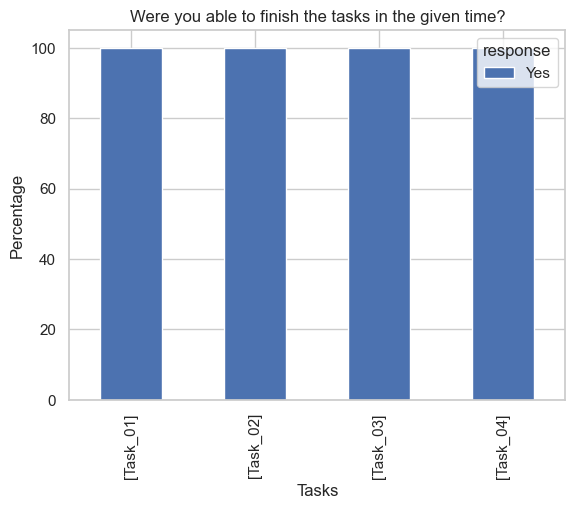

In [80]:
# Melt the dataframe to have the columns as rows
df_survey_melted = df_survey.melt(value_vars=['G03Q22[SQ001]', 'G03Q22[SQ002]', 'G03Q22[SQ003]', 'G03Q22[SQ004]'], value_name='response', var_name='question')

#rename
df_survey_melted['question'] = df_survey_melted['question'].replace({
    'G03Q22[SQ001]': '[Task_01]',
    'G03Q22[SQ002]': '[Task_02]',
    'G03Q22[SQ003]': '[Task_03]',
    'G03Q22[SQ004]': '[Task_04]'
})

# Group by question and response and count the number of each response
df_grouped = df_survey_melted.groupby(['question', 'response']).size().unstack()

# Convert counts to percentages
df_grouped = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

# Plot the data
ax = df_grouped.plot(kind='bar', stacked=True)
ax.set_ylabel('Percentage')
ax.set_title('Were you able to finish the tasks in the given time?')
# rename x-axis titel with: Were you able to finish the tasks in the given time?
ax.set_xlabel('Tasks')
plt.show()


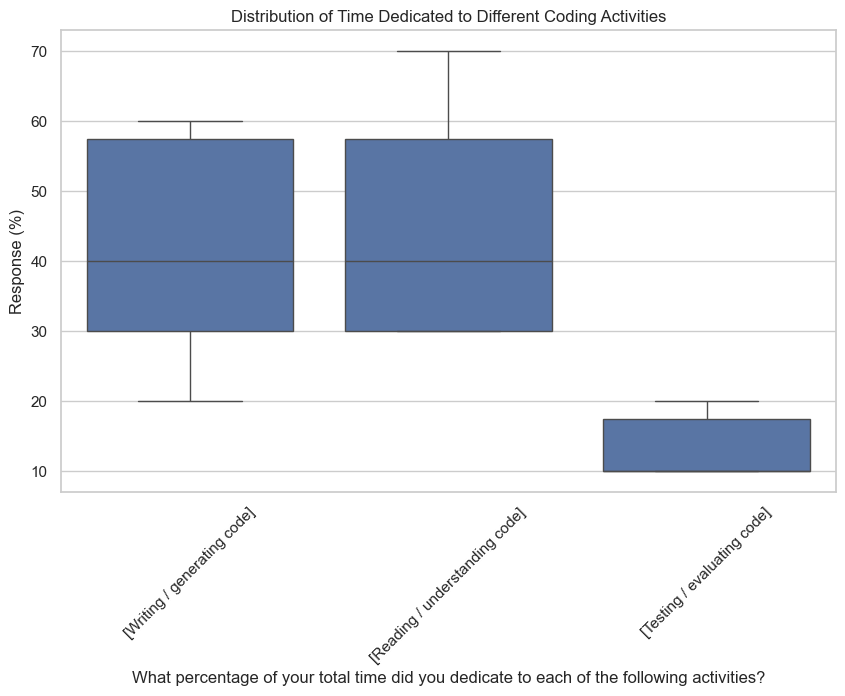

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the dataframe to have the columns as rows (assuming df_survey is your original DataFrame)
df_survey_melted = df_survey.melt(value_vars=['G03Q23[SQ001]', 'G03Q23[SQ002]', 'G03Q23[SQ003]'], 
                                  value_name='response', var_name='question')

# Rename questions for better readability
df_survey_melted['question'] = df_survey_melted['question'].replace({
    'G03Q23[SQ001]': '[Writing / generating code]',
    'G03Q23[SQ002]': '[Reading / understanding code]',
    'G03Q23[SQ003]': '[Testing / evaluating code]'
})

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='question', y='response', data=df_survey_melted)
plt.ylabel('Response (%)')
plt.title('Distribution of Time Dedicated to Different Coding Activities')
plt.xlabel('What percentage of your total time did you dedicate to each of the following activities?')
plt.xticks(rotation=45)
plt.show()


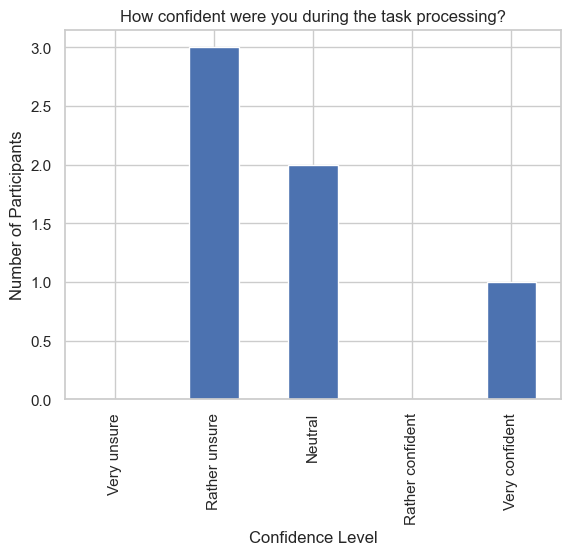

In [82]:
# visualize the column G01Q10
# the question is: How confident were you during the task processing? The options are:  Very unsure, Rather unsure,  Neutral, Rather confident, Very confident
# show all options in the chart
df_survey['G01Q10'] = pd.Categorical(df_survey['G01Q10'], categories=['Very unsure', 'Rather unsure', 'Neutral', 'Rather confident', 'Very confident'], ordered=True)
df_survey['G01Q10'].value_counts().sort_index().plot(kind='bar')
plt.title('How confident were you during the task processing?')
plt.ylabel('Number of Participants')
plt.xlabel('Confidence Level')
plt.show()


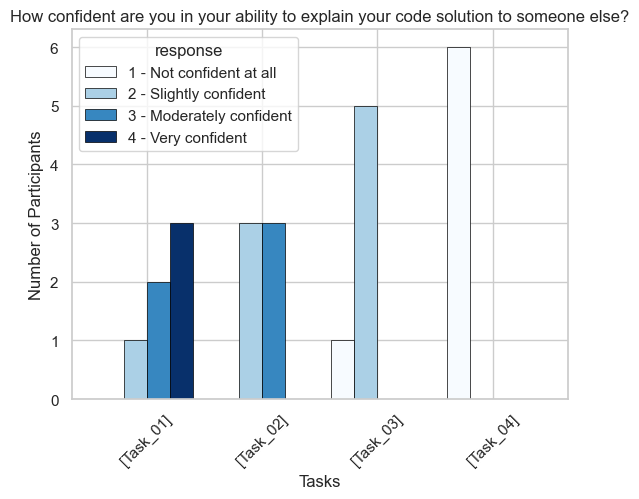

In [83]:
import matplotlib.pyplot as plt

# Melt the dataframe to have the columns as rows
df_survey_melted = df_survey.melt(value_vars=['G03Q09[SQ001]', 'G03Q09[SQ002]', 'G03Q09[SQ003]', 'G03Q09[SQ004]'], 
                                  value_name='response', var_name='question')

# Rename the questions for better readability
df_survey_melted['question'] = df_survey_melted['question'].replace({
    'G03Q09[SQ001]': '[Task_01]',
    'G03Q09[SQ002]': '[Task_02]',
    'G03Q09[SQ003]': '[Task_03]',
    'G03Q09[SQ004]': '[Task_04]'
})

# Group by question and response and count the number of each response
df_grouped = df_survey_melted.groupby(['question', 'response']).size().unstack()

# Plot the data as a grouped bar chart with a single color and different shades
ax = df_grouped.plot(kind='bar', width=0.8, colormap='Blues', edgecolor='black', linewidth=0.5)  # Use 'Blues' colormap for different shades of blue
ax.set_ylabel('Number of Participants')
ax.set_title('How confident are you in your ability to explain your code solution to someone else?')
ax.set_xlabel('Tasks')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.show()


In [84]:
# visualize the same in a data table
# only show 2 decimal places
df_grouped = df_grouped.round(2)
df_grouped

response,1 - Not confident at all,2 - Slightly confident,3 - Moderately confident,4 - Very confident
question,,,,
[Task_01],NaN,1.0,2.0,3.0
[Task_02],NaN,3.0,3.0,NaN
[Task_03],1.0,5.0,NaN,NaN
[Task_04],6.0,NaN,NaN,NaN


C:\Users\LucaH\AppData\Local\Temp\ipykernel_151460\2966873184.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_survey_melted.groupby(['question', 'response']).size().unstack()


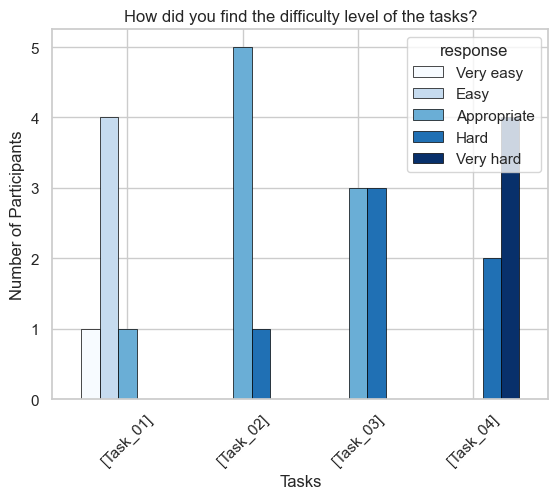

In [85]:
import matplotlib.pyplot as plt

# Melt the dataframe to have the columns as rows
df_survey_melted = df_survey.melt(value_vars=['G03Q08[SQ001]', 'G03Q08[SQ002]', 'G03Q08[SQ003]', 'G03Q08[SQ004]'], 
                                  value_name='response', var_name='question')

# Rename the questions for better readability
df_survey_melted['question'] = df_survey_melted['question'].replace({
    'G03Q08[SQ001]': '[Task_01]',
    'G03Q08[SQ002]': '[Task_02]',
    'G03Q08[SQ003]': '[Task_03]',
    'G03Q08[SQ004]': '[Task_04]'
})

# Set the order of the response categories
response_categories = ['Very easy', 'Easy', 'Appropriate', 'Hard', 'Very hard']
df_survey_melted['response'] = pd.Categorical(df_survey_melted['response'], categories=response_categories, ordered=True)

# Group by question and response and count the number of each response
df_grouped = df_survey_melted.groupby(['question', 'response']).size().unstack()

# Plot the data as a grouped bar chart with a single color and different shades
ax = df_grouped.plot(kind='bar', width=0.8, colormap='Blues', edgecolor='black', linewidth=0.5)  # Use 'Blues' colormap for different shades of blue
ax.set_ylabel('Number of Participants')
ax.set_title('How did you find the difficulty level of the tasks?')
ax.set_xlabel('Tasks')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.show()


In [86]:
# create a new column G03Q11[other_boolean] that is "yes" if G03Q11[other] is not empty, otherwise "no"
df_survey['G03Q11[other_boolean]'] = 'No'
df_survey.loc[df_survey['G03Q11[other]'].notnull(), 'G03Q11[other_boolean]'] = 'Yes'

C:\Users\LucaH\AppData\Local\Temp\ipykernel_151460\391703593.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_survey_melted.groupby('question').size().reset_index(name='count')


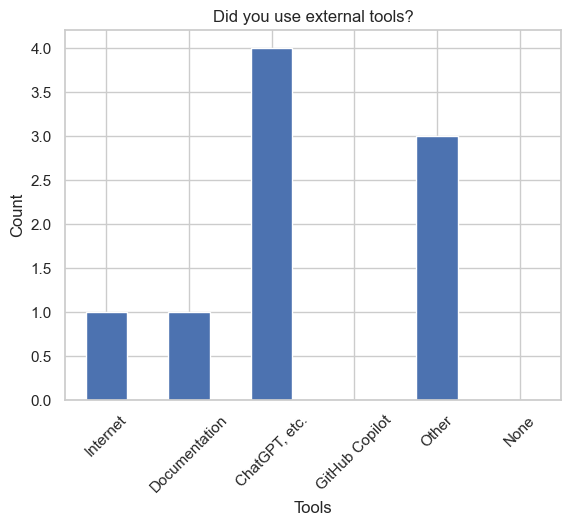

In [87]:
import matplotlib.pyplot as plt

# Split the multiple responses into separate rows
df_survey_melted = df_survey.melt(value_vars=['G03Q11[SQ001]', 'G03Q11[SQ002]', 'G03Q11[SQ003]', 'G03Q11[SQ004]', 'G03Q11[SQ005]', 'G03Q11[other_boolean]'], 
                                  value_name='response', var_name='question')
df_survey_melted = df_survey_melted.dropna(subset=['response'])  # Drop rows with NaN responses
df_survey_melted['response'] = df_survey_melted['response'].str.split(';')  # Split responses by semicolon
df_survey_melted = df_survey_melted.explode('response')  # Explode the list into separate rows

# Filter for "Yes" responses only
df_survey_melted = df_survey_melted[df_survey_melted['response'] == 'Yes']

# Rename the questions for better readability
df_survey_melted['question'] = df_survey_melted['question'].replace({
    'G03Q11[SQ001]': 'Internet',
    'G03Q11[SQ002]': 'Documentation',
    'G03Q11[SQ003]': 'ChatGPT, etc.',
    'G03Q11[SQ004]': 'GitHub Copilot',
    'G03Q11[SQ005]': 'None',
    'G03Q11[other_boolean]': 'Other'
})

# Ensure all possible categories are included
categories = ['Internet', 'Documentation', 'ChatGPT, etc.', 'GitHub Copilot', 'Other', 'None']
df_survey_melted['question'] = pd.Categorical(df_survey_melted['question'], categories=categories, ordered=True)

# Group by question and count the number of "Yes" responses
df_grouped = df_survey_melted.groupby('question').size().reset_index(name='count')

# Plot the data as a bar chart
ax = df_grouped.plot(kind='bar', x='question', y='count', legend=False)
ax.set_ylabel('Count')
ax.set_title('Did you use external tools?')
ax.set_xlabel('Tools')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.show()


In [88]:
# print 'Other' responses
df_survey['G03Q11[other]'].dropna()

0    Claude AI
4      Claude 
5      Copilot
Name: G03Q11[other], dtype: object

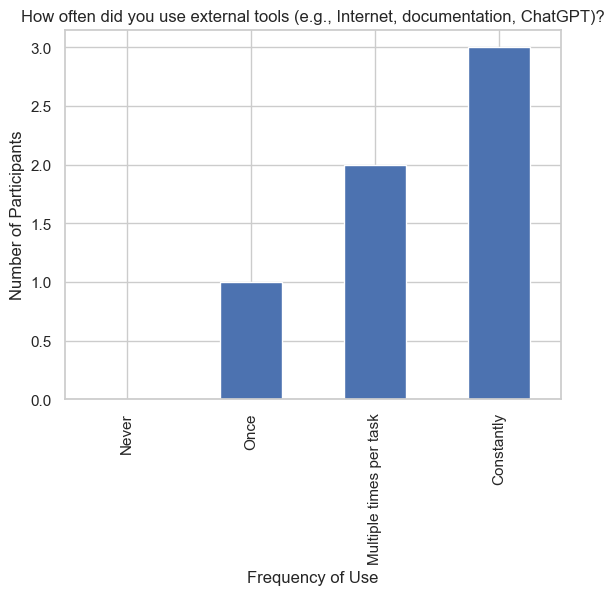

In [89]:
# visualize the column G01Q12
# the question is: How often did you use external tools (e.g., Internet, documentation, ChatGPT)? The options are: Never, Once, Multiple times per task, Constantly
# show all options in the chart
df_survey['G01Q12'] = pd.Categorical(df_survey['G01Q12'], categories=['Never', 'Once', 'Multiple times per task', 'Constantly'], ordered=True)
df_survey['G01Q12'].value_counts().sort_index().plot(kind='bar')
plt.title('How often did you use external tools (e.g., Internet, documentation, ChatGPT)?')
plt.ylabel('Number of Participants')
plt.xlabel('Frequency of Use')
plt.show()


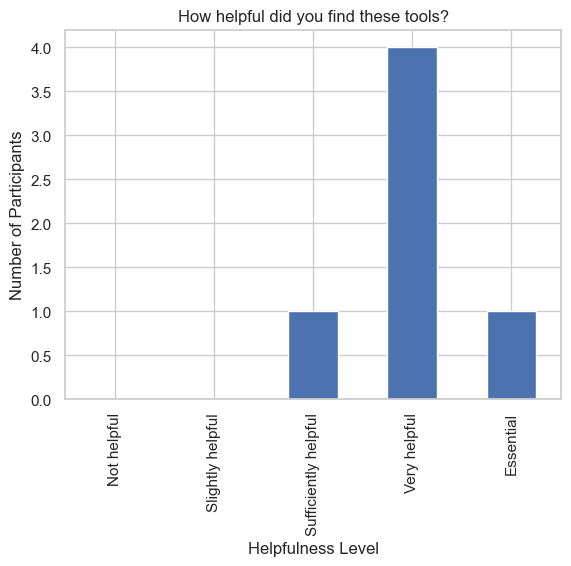

In [90]:
# visualize the column G01Q13
# the question is: How helpful did you find these tools? The options are: Not helpful, Slightly helpful, Sufficiently helpful, Very helpful, Essential
# show all options in the chart
df_survey['G01Q13'] = pd.Categorical(df_survey['G01Q13'], categories=['Not helpful', 'Slightly helpful', 'Sufficiently helpful', 'Very helpful', 'Essential'], ordered=True)
df_survey['G01Q13'].value_counts().sort_index().plot(kind='bar')
plt.title('How helpful did you find these tools?')
plt.ylabel('Number of Participants')
plt.xlabel('Helpfulness Level')
plt.show()


In [91]:
# the column G04Q14[other] collects the other answers. if G04Q14 is nan, then replace it with G04Q14[other]
df_survey['G04Q14'] = df_survey['G04Q14'].fillna(df_survey['G04Q14[other]'])

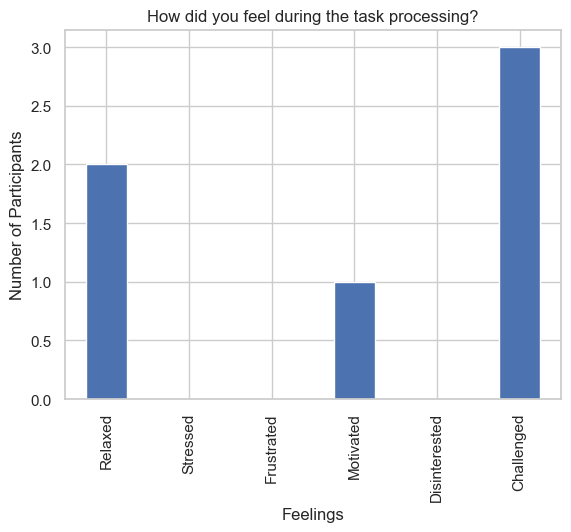

In [92]:
# visualize the column G04Q14
# the question is: How did you feel during the task processing? The options are: Relaxed, Stressed, Frustrated, Motivated, Disinterested, Challenged
df_survey['G04Q14'] = pd.Categorical(df_survey['G04Q14'], categories=['Relaxed', 'Stressed', 'Frustrated', 'Motivated', 'Disinterested', 'Challenged'], ordered=True)
df_survey['G04Q14'].value_counts().sort_index().plot(kind='bar')
plt.title('How did you feel during the task processing?')
plt.ylabel('Number of Participants')
plt.xlabel('Feelings')
plt.show()


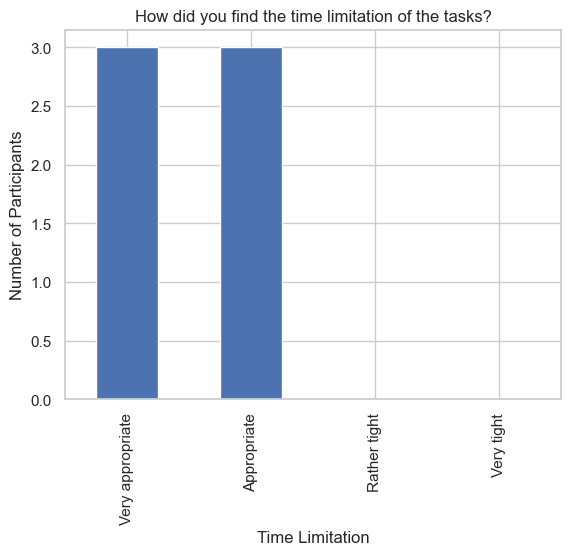

In [93]:
# visualize the column G04Q16
# the question is: How did you find the time limitation of the tasks? The options are: Very appropriate, Appropriate, Rather tight, Very tight
df_survey['G04Q16'] = pd.Categorical(df_survey['G04Q16'], categories=['Very appropriate', 'Appropriate', 'Rather tight', 'Very tight'], ordered=True)
df_survey['G04Q16'].value_counts().sort_index().plot(kind='bar')
plt.title('How did you find the time limitation of the tasks?')
plt.ylabel('Number of Participants')
plt.xlabel('Time Limitation')
plt.show()


In [94]:
# create a new column G05Q17[other_boolean] that is "yes" if G05Q17[other] is not empty, otherwise "no"
df_survey['G05Q17[other_boolean]'] = 'No'
df_survey.loc[df_survey['G05Q17[other]'].notnull(), 'G05Q17[other_boolean]'] = 'Yes'

C:\Users\LucaH\AppData\Local\Temp\ipykernel_151460\3009907267.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_survey_melted.groupby(['question', 'response']).size().unstack(fill_value=0)


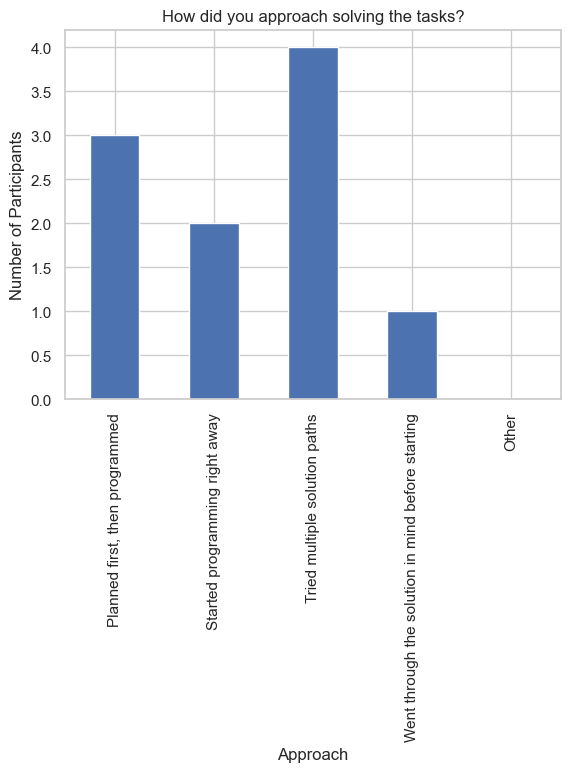

In [95]:
# Melt the dataframe to have the columns as rows
df_survey_melted = df_survey.melt(value_vars=['G05Q17[SQ001]', 'G05Q17[SQ002]', 'G05Q17[SQ003]', 'G05Q17[SQ004]', 'G05Q17[other_boolean]'], value_name='response', var_name='question')

# Rename the questions for better readability
df_survey_melted['question'] = df_survey_melted['question'].replace({
    'G05Q17[SQ001]': 'Planned first, then programmed',
    'G05Q17[SQ002]': 'Started programming right away',
    'G05Q17[SQ003]': 'Tried multiple solution paths',
    'G05Q17[SQ004]': 'Went through the solution in mind before starting',
    'G05Q17[other_boolean]': 'Other'
})

# Ensure all possible categories are included
categories = ['Planned first, then programmed', 'Started programming right away', 'Tried multiple solution paths', 'Went through the solution in mind before starting', 'Other']
df_survey_melted['question'] = pd.Categorical(df_survey_melted['question'], categories=categories, ordered=True)

# Filter to include only "Yes" responses
df_survey_melted = df_survey_melted[df_survey_melted['response'] == 'Yes']

# Group by question and count the number of each response
df_grouped = df_survey_melted.groupby(['question', 'response']).size().unstack(fill_value=0)

# Plot the data
ax = df_grouped.plot(kind='bar', legend=False)
ax.set_ylabel('Number of Participants')
ax.set_title('How did you approach solving the tasks?')
ax.set_xlabel('Approach')
plt.show()


In [96]:
# print 'Other' responses
df_survey['G05Q17[other]'].dropna()

Series([], Name: G05Q17[other], dtype: float64)

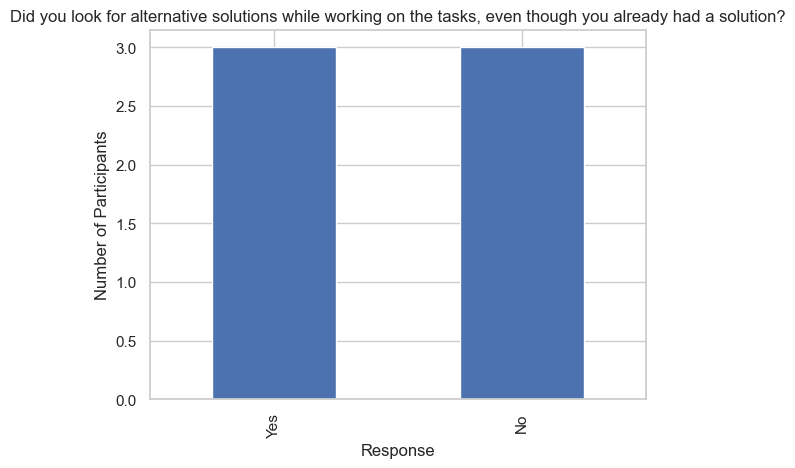

In [97]:
# Visualize the column G05Q18
# The question is: Did you look for alternative solutions while working on the tasks, even though you already had a solution?
# The options are: Yes and No
df_survey['G05Q18'] = pd.Categorical(df_survey['G05Q18'], categories=['Yes', 'No'], ordered=True)
df_survey['G05Q18'].value_counts().sort_index().plot(kind='bar')
plt.title('Did you look for alternative solutions while working on the tasks, even though you already had a solution?')
plt.ylabel('Number of Participants')
plt.xlabel('Response')
plt.show()

In [98]:
# create a new column G01Q19[other_boolean] that is "Yes" if G01Q19[other] is not empty, otherwise "No"
df_survey['G01Q19[other_boolean]'] = 'No'
df_survey.loc[df_survey['G01Q19[other]'].notnull(), 'G01Q19[other_boolean]'] = 'Yes'

C:\Users\LucaH\AppData\Local\Temp\ipykernel_151460\4063951674.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_survey_melted.groupby(['question', 'response']).size().unstack(fill_value=0)


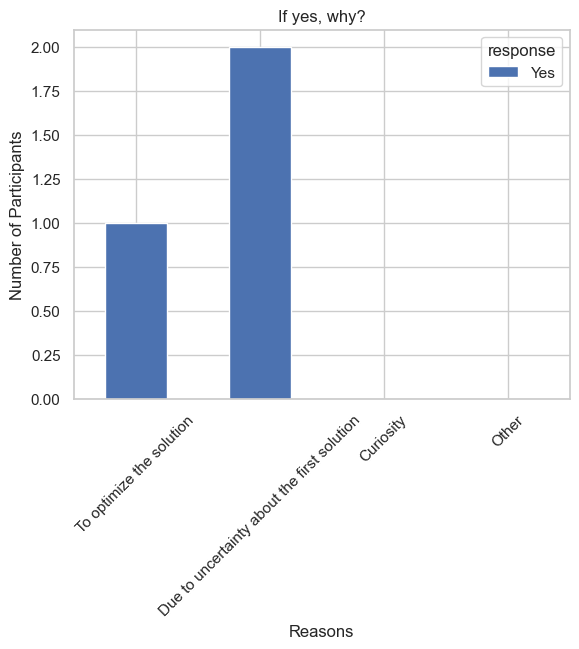

In [99]:
# Melt the dataframe to have the columns as rows
df_survey_melted = df_survey.melt(value_vars=['G01Q19[SQ001]', 'G01Q19[SQ002]', 'G01Q19[SQ003]', 'G01Q19[other]'], 
                                  value_name='response', var_name='question')

# Rename the questions for better readability
df_survey_melted['question'] = df_survey_melted['question'].replace({
    'G01Q19[SQ001]': 'To optimize the solution',
    'G01Q19[SQ002]': 'Due to uncertainty about the first solution',
    'G01Q19[SQ003]': 'Curiosity',
    'G01Q19[other]': 'Other'
})

# Ensure all possible categories are included
categories = ['To optimize the solution', 'Due to uncertainty about the first solution', 'Curiosity', 'Other']
df_survey_melted['question'] = pd.Categorical(df_survey_melted['question'], categories=categories, ordered=True)

# Filter to include only "Yes" responses
df_survey_melted = df_survey_melted[df_survey_melted['response'] == 'Yes']

# Group by question and count the number of each response
df_grouped = df_survey_melted.groupby(['question', 'response']).size().unstack(fill_value=0)

# Plot the data as a grouped bar chart
ax = df_grouped.plot(kind='bar', stacked=True)
ax.set_ylabel('Number of Participants')
ax.set_title('If yes, why?')
ax.set_xlabel('Reasons')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.show()

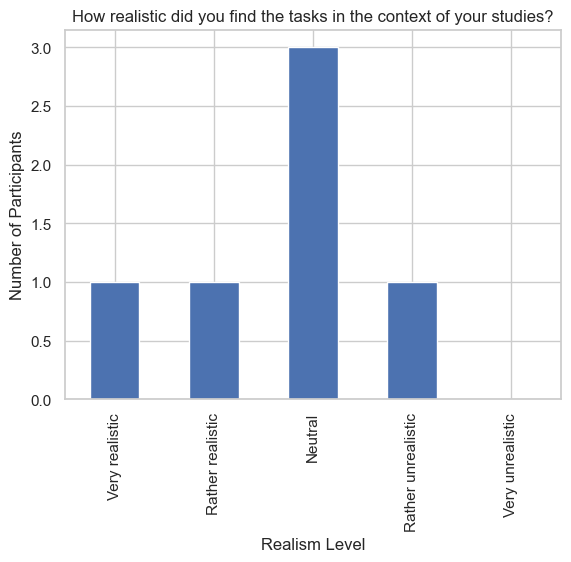

In [100]:
# Set the order of the response categories
df_survey['G06Q19'] = pd.Categorical(df_survey['G06Q19'], categories=['Very realistic', 'Rather realistic', 'Neutral', 'Rather unrealistic', 'Very unrealistic'], ordered=True)

# Plot the data
df_survey['G06Q19'].value_counts().sort_index().plot(kind='bar')
plt.title('How realistic did you find the tasks in the context of your studies?')
plt.ylabel('Number of Participants')
plt.xlabel('Realism Level')
plt.show()

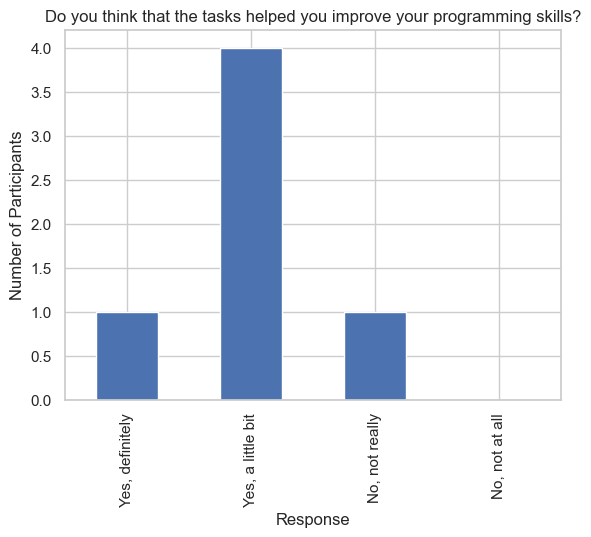

In [101]:
# Set the order of the response categories
df_survey['G06Q20'] = pd.Categorical(df_survey['G06Q20'], categories=['Yes, definitely', 'Yes, a little bit', 'No, not really', 'No, not at all'], ordered=True)

# Plot the data
df_survey['G06Q20'].value_counts().sort_index().plot(kind='bar')
plt.title('Do you think that the tasks helped you improve your programming skills?')
plt.ylabel('Number of Participants')
plt.xlabel('Response')
plt.show()

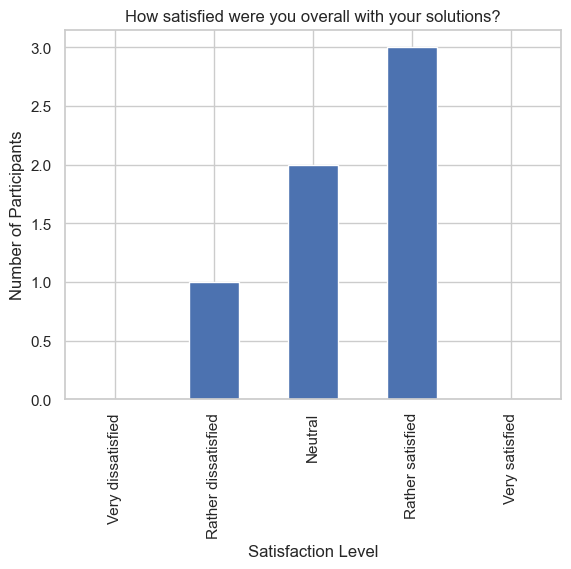

In [102]:
# Set the order of the response categories
df_survey['G06Q21'] = pd.Categorical(df_survey['G06Q21'], categories=['Very dissatisfied', 'Rather dissatisfied', 'Neutral', 'Rather satisfied', 'Very satisfied'], ordered=True)

# Plot the data
df_survey['G06Q21'].value_counts().sort_index().plot(kind='bar')
plt.title('How satisfied were you overall with your solutions?')
plt.ylabel('Number of Participants')
plt.xlabel('Satisfaction Level')
plt.show()

In [103]:
# print all results from G06Q22
print("Were there any difficulties that particularly challenged you during the task processing? (e.g., technical nature, content-related)")
for comment in df_survey['G06Q22'].dropna():
    print(comment)

Were there any difficulties that particularly challenged you during the task processing? (e.g., technical nature, content-related)


In [104]:
# print all results from G01Q23
print("Do you have any further comments or feedback on the experiment?")
for comment in df_survey['G01Q23'].dropna():
    print(comment)

Do you have any further comments or feedback on the experiment?
The task showed how advanced and capable Generative AI assistants are today and how there is no need for human intervention apart from slight adaptions to the style of the code or testing the generated code blocks.
